# Pytorch introduction

Credits are given to the official Introduction to Pytorch from which some parts of this notebook were taken: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

## Pytorch basics

Whenever you are looking for a Pytorch function that does something specific or you want to know what a certain function or class does in Pytorch, \
you can always google the command and take a look at the official Pytorch documentation. \
For example, this is the documentation for the torch.Tensor object: https://pytorch.org/docs/stable/tensors.html \
Let's start this intro by importing torch!

In [91]:
import torch

Let’s see a few basic tensor manipulations. First, just a few of the ways to create tensors:

In [95]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


Above, we create a 5x3 matrix filled with zeros, and query its datatype to find out that the zeros are 32-bit floating point numbers, which is the default PyTorch. \
What if you wanted integers instead? You can always override the default:

In [96]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


You can see that when we do change the default, the tensor helpfully reports this when printed. \
It’s common to initialize learning weights randomly, often with a specific seed for the pseudo random number generator for reproducibility of results:

In [97]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2) # returns a tensor filled with random numbers from a uniform distribution on the interval [0, 1)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


PyTorch tensors perform arithmetic operations intuitively. Tensors of similar shapes may be added, multiplied, etc. Operations with scalars are distributed over the tensor:

In [98]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
# uncomment this line to get a runtime error
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


Here’s a small sample of the mathematical operations available:

In [99]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.sin(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.9956, -0.2232],
        [ 0.3858, -0.6593]])

Absolute value of r:
tensor([[0.9956, 0.2232],
        [0.3858, 0.6593]])

Inverse sine of r:
tensor([[ 0.8391, -0.2213],
        [ 0.3763, -0.6126]])

Average and standard deviation of r:
(tensor(0.7217), tensor(0.1247))

Maximum value of r:
tensor(0.9956)


There are also many other useful commands. To give a few examples:

In [100]:
# Instead of uniformly distributed random numbers, there are also other random number generators available, for example:
ints = torch.randint(0, 10, (10,))
print('Random integers:')
print(ints)
gaussians = torch.randn(10)
print('Random numbers from standard normal distribution:')
print(gaussians)

# Instead of getting the maximum or minimum value, it is often useful to get the index of the maximum or minimum value:
r = torch.rand(10)
print('\nA random vector, r:')
print(r)
print('Indice of the maximum value in r:')
print(torch.argmax(r))
print('Indice of the minimum value in r:')
print(torch.argmin(r))

# create regularly spaced numbers between two values
linspace = torch.linspace(1, 10, 10)
print('\nRegularly spaced numbers between 1 and 10:')
print(linspace)



# numpy arrays can be converted to tensors and vice versa
import numpy as np
a = np.array([1, 2, 3])
t = torch.from_numpy(a) # shares memory with numpy array, as opposed to using 'torch.tensor(a)'
print('\nNumpy array:')
print(a)
print('Tensor from numpy array:')
print(t)
print('Numpy array from tensor:')
print(t.numpy())

Random integers:
tensor([8, 4, 9, 7, 4, 8, 9, 6, 2, 1])
Random numbers from standard normal distribution:
tensor([-1.1860, -0.4872, -1.9286, -1.1155,  2.2702,  0.1513, -0.6572,  0.0337,
         0.5095, -1.2934])

A random vector, r:
tensor([0.7191, 0.4067, 0.7301, 0.6276, 0.7357, 0.0381, 0.2138, 0.5395, 0.3686,
        0.4007])
Indice of the maximum value in r:
tensor(4)
Indice of the minimum value in r:
tensor(5)

Regularly spaced numbers between 1 and 10:
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Numpy array:
[1 2 3]
Tensor from numpy array:
tensor([1, 2, 3])
Numpy array from tensor:
[1 2 3]


Tensors in Pytorch are objects. As you know, objects have attributes and methods. These are also often useful to obtain characteristics of tensor. \
In fact, the functionality of many functions is also directly available as a tensor method:

In [101]:
r = torch.rand(10)
print('\nA random vector, r:')
print(r)
print('Indice of the maximum value in r:')
print(torch.argmax(r))
print('You can also obtain the indice of the maximum value via a method instead of an external function:')
print(r.argmax())


A random vector, r:
tensor([0.7220, 0.8217, 0.2612, 0.7375, 0.8328, 0.8444, 0.2941, 0.3788, 0.4567,
        0.0649])
Indice of the maximum value in r:
tensor(5)
You can also obtain the indice of the maximum value via a method instead of an external function:
tensor(5)


# Pytorch dimensions

Just as numpy, Pytorch can easily represent multi-dimensional objects such as images:

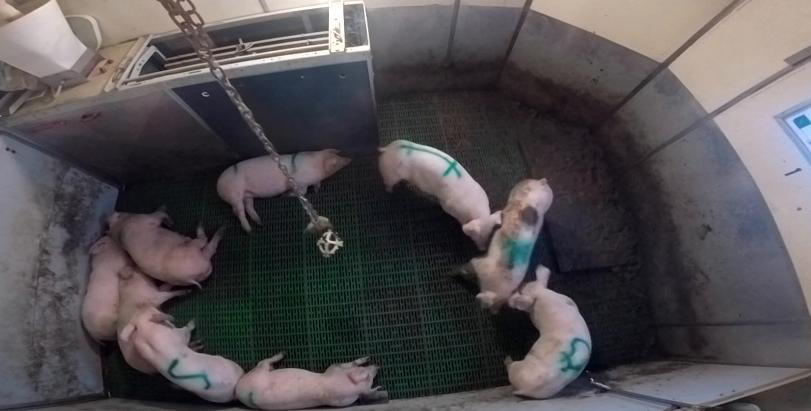

Tensor shape: torch.Size([3, 411, 811])
Tensor type: torch.float32


In [102]:
from PIL import Image # PIL is a Python Imaging Library
import torchvision.transforms as transforms # torchvision offers useful tools for image processing
from IPython.display import display

# Open the image file
image_path = '/user/henrich1/u12112/repos/DaNuMa2024/data/raw_data/introduction/test1.jpg'
image = Image.open(image_path)
display(image)

# Convert to tensor
transform = transforms.ToTensor()
image = transform(image)
print(f'Tensor shape: {image.shape}')
print(f'Tensor type: {image.dtype}')

As you can see, Pytorch represents images as three-dimensional tensors. \
The first dimension represents the red, green and blue values for each pixel. \
The second and third dimension represent the height and width of the image. \
Indexing a tensor works just as in numpy, for example:

In [104]:
print('Get pixel values at the center of the image:')
print(image[:, 180, 320])

print('Get only the red-channel of the image')
print(image[0, :, :].shape)
print(image[0, :, :])

Get pixel values at the center of the image:
tensor([0.2706, 0.2235, 0.2392])
Get only the red-channel of the image
torch.Size([411, 811])
tensor([[0.7725, 0.7529, 0.7725,  ..., 0.7333, 0.7333, 0.7333],
        [0.7765, 0.7647, 0.7765,  ..., 0.7333, 0.7333, 0.7333],
        [0.7725, 0.7765, 0.7843,  ..., 0.7373, 0.7373, 0.7373],
        ...,
        [0.2471, 0.2431, 0.2392,  ..., 0.3098, 0.3098, 0.3098],
        [0.1608, 0.1608, 0.1608,  ..., 0.3216, 0.3216, 0.3216],
        [0.1922, 0.1961, 0.2000,  ..., 0.3333, 0.3333, 0.3333]])


transforms.ToTensor() automatically normalized pixel values to the interval (0, 1). \
Normally, the intensity values for pixels are between 0 and 255. \
To get the unnormalized values, you can simply multiply them with 255:

In [54]:
print('Unnormalized pixel values:')
print(image[:, 180, 320] * 255)

Unnormalized pixel values:
tensor([69., 57., 61.])


We can also inspect how the individual color channels contribute to the image by setting the other values to zero

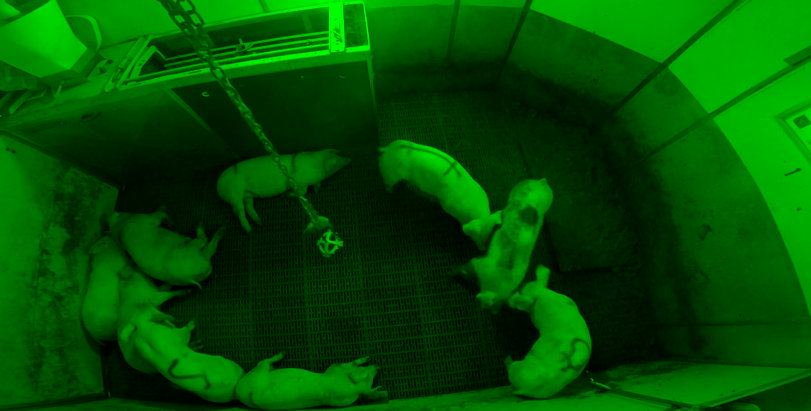

In [105]:
image_copy = image.clone()
image_copy[[0, 2], ...] = 0

transform = transforms.ToPILImage()
image_copy = transform(image_copy)
display(image_copy)

You can also add dimensions to an existing tensor:

In [106]:
example_tensor = torch.randn(3, 224, 224)

example_tensor_with_added_dimension = example_tensor.unsqueeze(0)
print('Added dimension at first position:')
print(example_tensor_with_added_dimension.shape)

example_tensor_with_added_dimension = example_tensor.unsqueeze(1)
print('Added dimension at second position:')
print(example_tensor_with_added_dimension.shape)

example_tensor_with_added_dimension = example_tensor[None, None, :, :, :, None]
print('If you want to add dimensions at the first or last position, you can also just index the whole tensor and add None:')
print(example_tensor_with_added_dimension.shape)

Added dimension at first position:
torch.Size([1, 3, 224, 224])
Added dimension at second position:
torch.Size([3, 1, 224, 224])
If you want to add dimensions at the first or last position, you can also just index the whole tensor and add None:
torch.Size([1, 1, 3, 224, 224, 1])


Redundant dimensions that only have a size of one can also be removed again:

In [107]:
print('Removing redundant dimensions that only have a size of one can be done with squeeze:')
print(example_tensor_with_added_dimension.squeeze().shape)

Removing redundant dimensions that only have a size of one can be done with squeeze:
torch.Size([3, 224, 224])


Multiple tensors are often stacked together in a batch so that they can be processed together. \
This can be done by adding a new dimension and then stacking the tensor along this dimension:

In [108]:
# create 4 pseudo-images using list comprehension
images = [torch.randn(3, 224, 224) for _ in range(4)]
# add dimension at first position for each of these images, again using list comprehension
images = [image.unsqueeze(0) for image in images]
# stack these images along the first dimension to obtain a batch of images
images = torch.cat(images, dim=0)

print('The first dimension of the images tensor represents the batch:')
print(images.shape)

The first dimension of the images tensor represents the batch:
torch.Size([4, 3, 224, 224])


When performing operations on high-dimensional tensors, it is often helpful to make use of so-called "broadcasting". \
In broadcasting, one tensor that is involved in the operation of interest is implicitly enlarged by duplicating values along other dimensions. \
Then the operation of interest is performed on this enlarged version. Let's have a look at an example:

In [109]:
# we create a pseudo-image first
image = torch.randn(3, 224, 224)
print(f'The shape of the image tensor: {image.shape}')
# we want to multiply the red channel by 0, the green channel by 0, and the blue channel by 1
multiplier = torch.tensor([0, 0, 1])
# We add dimensions to the multiplier tensor to make it compatible with the image tensor
multiplier = multiplier[:, None, None]
print(f'The shape of the multiplier tensor: {multiplier.shape}')
# If we now compute the product of the image tensor and the multiplier tensor, each pixel of the image tensor will be multiplied by the corresponding value in the multiplier tensor
product = image * multiplier
# All red and green values will be zeros
print('\nThe red and green values are zero:')
print(product[[0, 1], :, :])
# All blue values will be the same as in the original image
print('\nThe blue values are the same as in the original image:')
print(product[2, :, :])

The shape of the image tensor: torch.Size([3, 224, 224])
The shape of the multiplier tensor: torch.Size([3, 1, 1])

The red and green values are zero:
tensor([[[-0., -0., 0.,  ..., -0., 0., -0.],
         [-0., -0., -0.,  ..., -0., 0., 0.],
         [-0., -0., -0.,  ..., -0., -0., 0.],
         ...,
         [0., -0., -0.,  ..., -0., -0., -0.],
         [-0., 0., -0.,  ..., 0., -0., -0.],
         [-0., 0., 0.,  ..., -0., 0., 0.]],

        [[0., 0., 0.,  ..., -0., 0., 0.],
         [-0., -0., -0.,  ..., -0., -0., -0.],
         [0., 0., 0.,  ..., -0., -0., 0.],
         ...,
         [0., -0., 0.,  ..., -0., 0., 0.],
         [-0., 0., -0.,  ..., -0., 0., -0.],
         [0., 0., 0.,  ..., -0., 0., -0.]]])

The blue values are the same as in the original image:
tensor([[ 0.0519, -0.0638,  0.4940,  ..., -0.3853, -0.6450,  1.0577],
        [-0.1861,  0.3190, -1.5889,  ..., -0.0189, -0.8002, -0.3837],
        [ 0.0484,  1.4277,  0.4578,  ..., -2.0144, -0.0923, -0.4345],
        ...,
     

# Pytorch with gpu

Check if a gpu is available:

In [110]:
torch.cuda.is_available()

False

If cuda is available, you can put tensors on the gpu for parallel processing:

In [ ]:
image = torch.randn(3, 224, 224)
image = image.cuda() 
# image = image.to('cuda') # does the same job

When performing computations, make sure that all tensors involved are on the same device (i.e. cuda or cpu):

In [7]:
test_tensor1 = torch.randn(64, 10).cuda()
test_tensor2 = torch.randn(64, 10).cuda()
elementwise_product = test_tensor1 * test_tensor2

If they are not on the same device, this will result in an error:

In [ ]:
test_tensor1 = torch.randn(64, 10).cuda()
test_tensor2 = torch.randn(64, 10)
elementwise_product = test_tensor1 * test_tensor2

## Pytorch modules (model components)

Let's take a look at how tensors are being processed by pytorch modules. \
We start by importing the necessary libraries:

In [112]:
import torch.nn as nn # the parent object for PyTorch models

The simplest model component is a linear layer that simply computes a weighted sum of the input. \
For demonstration purposes, the layer is initialized without a bias and with a constant value for all parameters.

In [19]:
linear_layer = nn.Linear(in_features=10, out_features=1, bias=False)
torch.nn.init.constant_(linear_layer.weight, 1.0)
print(linear_layer.weight)
print(linear_layer.bias)

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)
None


We basically initialized a linear model where all parameters w1, ..., w10 have a value of 1 and there is no intercept (called bias in the context of machine learning). \
Since the parameter values are all 1, this linear layer just computes the sum of the input. \
We can apply this module to an input tensor by calling it like a function:

In [22]:
input = torch.ones(10)
print(linear_layer(input))

tensor([10.], grad_fn=<SqueezeBackward4>)


If we apply the model on a tensor that also consists only of ones, we of course get 10 as a result. \
The attributes requires_grad and grad_fn indicate that these tensors will be taken into account when a gradient is computed. \
We will take about this tomorrow, so feel free to ignore this right now.\
\
We can also apply the linear layer on a batch of inputs. This will independently apply the module on each individual input in the batch:

In [ ]:
# lets fill the first input of the batch with ones, the second with twos, the third with threes, and so on...
inputs = torch.ones(64, 10)
multiplier = torch.arange(1, 65, 1)
multiplier = multiplier[:, None]
inputs = inputs * multiplier
# we can now pass the inputs to the linear layer
output = linear_layer(inputs)
print(f'Shape of the output: {output.shape}')
print(f'As expected, the first output is 10, the second is 20, the third is 30, and so on: \n{output}')

Let's take a look at a more complex model component, the so-called convolution layer. \
The convolution layer is an essential module when processing images with neural networks. \
Once again we set the bias to zero for simplicity and set all parameter values of the layer to 1. \
The convolution layer takes three arguments: in_channels, out_channels and kernel_size:

In [83]:
conv_layer = nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, bias=False)
torch.nn.init.constant_(conv_layer.weight, 1.0)
print(conv_layer.weight.shape)

torch.Size([8, 8, 3, 3])


The parameters of the convolution layer will have a shape of out_channels x in_channels x kernel_size x kernel_size (in this case 8x8x3x3). \
However, it is easier to think of these parameters as 8 separate "kernels" which each have a size of 8x3x3. \
When you apply the convolution layer on an input, these kernels will "slide" over the input and perform pairwise multiplication with the repsective part of the input. \
Since we initialized the weights of the kernel all with all ones, the result will be the sum of the values at the respective part of the input. \
Also notice that the input size shrinks from 7 to 5 since no padding applied automatically. This would have to be specified as a separate argument when initializing the conv_layer. \
A really nice animated example of a convolution layer with the same input/output channels and kernel size can be found here: https://animatedai.github.io/

In [89]:
input = torch.ones(8, 7, 7)
output = conv_layer(input)
print(f'Shape of the output: {output.shape}')
print(f'As expected, the output values are just the sums of the values of the respective part of the input: \n{output}')

Shape of the output: torch.Size([8, 5, 5])
As expected, the output values are just the sums of the values of the respective part of the input: 
tensor([[[72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.]],

        [[72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.]],

        [[72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.]],

        [[72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.]],

        [[72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 72., 72., 72.],
         [72., 72., 

## Exercises